In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import pygrib
from scipy import interpolate

In [3]:
ds_hrrr = xr.open_dataset('unet_test_data/HRRR_refc_0000_2200.nc')
ds_mrms = xr.open_dataset('MRMS_data_2019_05_16/MRMS_MESH_2000_2100.nc')

In [4]:
lats = ds_hrrr.latitude.values
lons = ds_hrrr.longitude.values

In [5]:
xs = ds_hrrr.x
ys = ds_hrrr.y

In [15]:
print(ds_mrms.longitude.shape)
print(ds_mrms.latitude.shape)
print(ds_hrrr.isel(time=0).refc.values.shape)

(7000,)
(3500,)
(1059, 1799)


In [13]:
spline = interpolate.interp2d(ds_mrms.longitude, ds_mrms.latitude, ds_mrms.unknown.isel(valid_time=0).values, kind='linear')

In [16]:
new_array = np.zeros((1059, 1799))
for i in range(1059):
    for j in range(1799):
        new_array[i,j] = spline(lons[i,j],lats[i,j])

In [17]:
new_array.shape

(1059, 1799)

In [19]:
ds_hrrr

<xarray.Dataset>
Dimensions:     (time: 23, x: 1799, y: 1059)
Coordinates:
  * time        (time) datetime64[ns] 2019-05-16 ... 2019-05-16T22:00:00
    step        timedelta64[ns] ...
    atmosphere  float64 ...
    latitude    (y, x) float64 21.14 21.15 21.15 21.16 ... 47.86 47.85 47.84
    longitude   (y, x) float64 237.3 237.3 237.3 237.4 ... 299.0 299.0 299.1
    valid_time  (time) datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables:
    refc        (time, y, x) float32 ...

In [23]:
ds_mrms_test = xr.Dataset(
     data_vars=dict(mesh=(["x", "y"], new_array)),
     coords=dict(longitude=(["x", "y"], lons),latitude=(["x", "y"], lats)))
     #attrs=dict(description="Weather related data."),)

In [24]:
ds_mrms_test

<xarray.Dataset>
Dimensions:    (x: 1059, y: 1799)
Coordinates:
    longitude  (x, y) float64 237.3 237.3 237.3 237.4 ... 299.0 299.0 299.1
    latitude   (x, y) float64 21.14 21.15 21.15 21.16 ... 47.86 47.85 47.84
Dimensions without coordinates: x, y
Data variables:
    mesh       (x, y) float64 -3.0 -3.0 -3.0 -3.0 -3.0 ... -3.0 -3.0 -3.0 -3.0

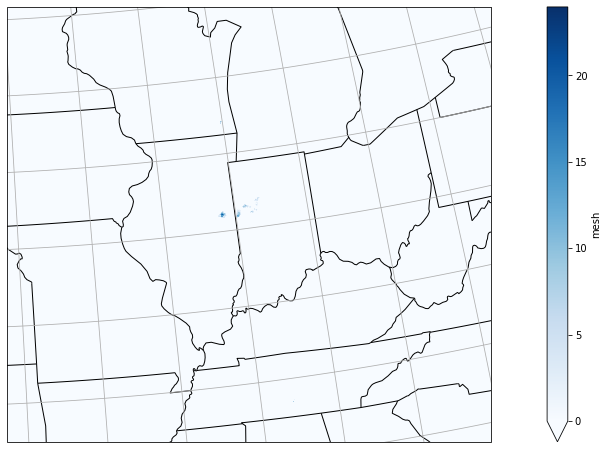

In [29]:
states_provinces = cp.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')
fig = plt.figure()
fig.set_size_inches(20,8)
p_ref_20 = ds_mrms_test.mesh.plot(x='longitude', y='latitude', transform=ccrs.PlateCarree(), subplot_kws={"projection": ccrs.Orthographic(-100, 35)},cmap="Blues",vmin=0)
p_ref_20.axes.set_extent([265,280,45,35])
p_ref_20.axes.coastlines()
p_ref_20.axes.gridlines()
p_ref_20.axes.add_feature(cp.feature.BORDERS)
p_ref_20.axes.add_feature(states_provinces)
plt.savefig("../../2019_05_16_figures/Interpolated_MESH_Midwest.png",bbox_inches='tight')

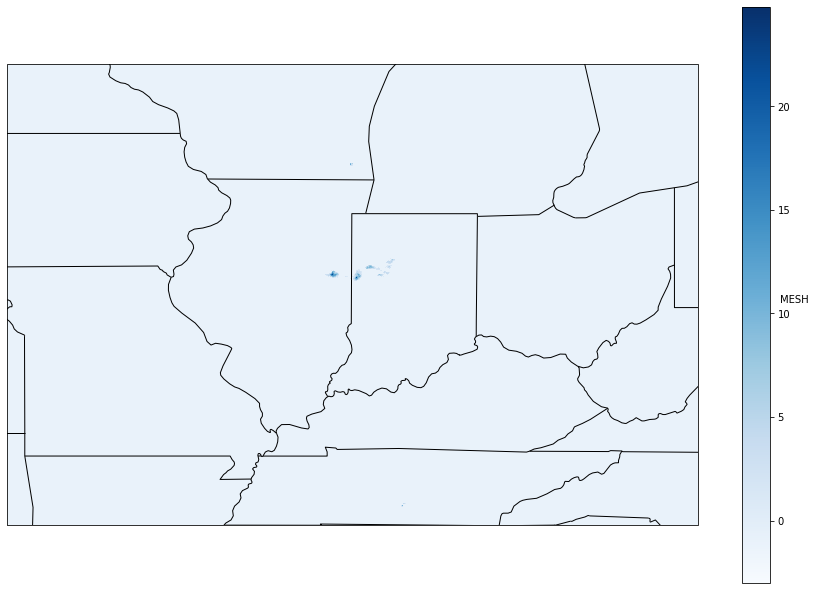

In [31]:
#set up the image
fig = plt.figure()
fig.set_size_inches(12,8)
#Specify that we're plotting on US map
ax=plt.axes([0.,0.,1.,1.],projection=ccrs.PlateCarree())
#Show this region of the map
ax.set_extent([265,280,45,35])

#The following lines do the same thing
#plot = ax.pcolormesh(mesh.values,extent=[230.0,300.0,55.0,20.0],transform=ccrs.PlateCarree())
plot = ax.pcolormesh(ds_mrms.longitude.values,ds_mrms.latitude.values,ds_mrms.unknown.isel(valid_time=0).values,transform=ccrs.PlateCarree(),cmap="Blues")

#Show map features
ax.add_feature(cp.feature.BORDERS)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(states_provinces)
#Add color bar
colbar = plt.colorbar(plot,orientation='vertical')
colbar.set_label('MESH',rotation='horizontal',fontsize='medium')
plt.savefig("../../2019_05_16_figures/Non-Interpolated_MESH_Midwest.png",bbox_inches='tight')